## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# import libraries needed for the project 

import pandas as pd
import numpy as np


In [2]:
# open the data file

data = pd.read_csv('./data/kc_house_data.csv')


## Data explorations

In [3]:
data.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0         NaN   0.0  ...      7        1180            0.0   
1      7242     2.0         0.0   0.0  ...      7        2170          400.0   
2     10000     1.0         0.0   0.0  ...      6         770            0.0   
3      5000     1.0         0.0   0.0  ...      7        1050          910.0   
4      8080     1.0         0.0   0.0  ...      8        1680            0.0   

  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0     1955           0.0    98178  47.5112 -122.257           1340        5650  
1     1951        1991.0    98125  47.7210 -122.319           1690        7639  
2     1933           NaN    98028  47.7379 -122.233           2720        8062  
3     1965           0.0    98136  47.5208 -122.393           1360        5000  
4     1987           0.0    98074  47.6168 -122.045           1800        7503  

[5 rows x 21 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
data = data.dropna()

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15762 entries, 1 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15762 non-null  int64  
 1   date           15762 non-null  object 
 2   price          15762 non-null  float64
 3   bedrooms       15762 non-null  int64  
 4   bathrooms      15762 non-null  float64
 5   sqft_living    15762 non-null  int64  
 6   sqft_lot       15762 non-null  int64  
 7   floors         15762 non-null  float64
 8   waterfront     15762 non-null  float64
 9   view           15762 non-null  float64
 10  condition      15762 non-null  int64  
 11  grade          15762 non-null  int64  
 12  sqft_above     15762 non-null  int64  
 13  sqft_basement  15762 non-null  object 
 14  yr_built       15762 non-null  int64  
 15  yr_renovated   15762 non-null  float64
 16  zipcode        15762 non-null  int64  
 17  lat            15762 non-null  float64
 18  long  

From this first screening, we can see that sqft_basement is an object, so we convert it into float. But when we try to apply the function astype, it gives an error. That's why we have to epxlore the oclumn a little further. By reading the corresponding error of astype and using the function .value_counts() we can see that the problem is that there is the sign "?". 


In [7]:

data['sqft_basement'].value_counts()

0.0       9362
?          333
600.0      155
500.0      151
700.0      148
          ... 
2010.0       1
1481.0       1
1913.0       1
4820.0       1
248.0        1
Name: sqft_basement, Length: 283, dtype: int64

To proceed with our analysis, we could detete the raws that contain "?", but then we will be losing 454 data points. Consiering that we have 21596 entries, 454 points correspond to a 2.1% of the points. As we want to do the best regression model and consider all the variables, we proceed to delte the values containing "?"

In [11]:
data = data[(data.sqft_basement != '?' )]


We can see that now we have 21143 entries 

In [12]:
data['sqft_basement'] = data['sqft_basement'].astype(str).astype(float)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15429 entries, 1 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15429 non-null  int64  
 1   date           15429 non-null  object 
 2   price          15429 non-null  float64
 3   bedrooms       15429 non-null  int64  
 4   bathrooms      15429 non-null  float64
 5   sqft_living    15429 non-null  int64  
 6   sqft_lot       15429 non-null  int64  
 7   floors         15429 non-null  float64
 8   waterfront     15429 non-null  float64
 9   view           15429 non-null  float64
 10  condition      15429 non-null  int64  
 11  grade          15429 non-null  int64  
 12  sqft_above     15429 non-null  int64  
 13  sqft_basement  15429 non-null  float64
 14  yr_built       15429 non-null  int64  
 15  yr_renovated   15429 non-null  float64
 16  zipcode        15429 non-null  int64  
 17  lat            15429 non-null  float64
 18  long  

Above we have confirm that the sqft_basement is now a float.
And we also convert the date to a datetime format

In [ ]:
#data['date'] = pd.to_datetime(data['date']).head()
#data.info()

To put a bit more of context, would be great to know where the houses are located. So let's explore the postcodes

In [14]:
data['zipcode'].value_counts()

98038    425
98103    415
98052    410
98042    408
98117    394
        ... 
98010     68
98102     63
98024     58
98148     41
98039     35
Name: zipcode, Length: 70, dtype: int64

In [15]:
data.sort_values('zipcode')

id        date     price  bedrooms  bathrooms  sqft_living  \
8653   3751600025   5/14/2014  139000.0         3       1.00         1100   
6813    304100010   12/9/2014  269500.0         4       2.25         1700   
14945  6306100190   5/21/2014  220000.0         4       2.50         2160   
14948  2595650170    6/9/2014  367300.0         4       2.75         2190   
19311  3356403400   7/24/2014  159000.0         3       1.00         1360   
...           ...         ...       ...       ...        ...          ...   
13754  7010700976  11/14/2014  505000.0         3       1.00         1100   
11528  2771600550  11/12/2014  950000.0         4       3.50         4030   
6467   2770601462   4/23/2015  503500.0         3       2.50         1810   
9140    369000690   8/12/2014  403504.0         4       1.00         1060   
3584   8127700215    4/9/2015  862000.0         4       2.25         2220   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
8653      17334     1.0         0.0   0.0  ...      7        1100   
6813       7056     2.0         0.0   0.0  ...      7        1700   
14945      8005     2.0         0.0   0.0  ...      7        2160   
14948     14937     2.0         0.0   0.0  ...      8        2190   
19311     20000     1.0         0.0   0.0  ...      7        1360   
...         ...     ...         ...   ...  ...    ...         ...   
13754      5400     1.5         0.0   0.0  ...      7        1100   
11528      4200     3.0         0.0   0.0  ...      9        4030   
6467       1750     2.0         0.0   0.0  ...      7        1350   
9140       5750     1.0         0.0   0.0  ...      6         950   
3584       4200     1.5         0.0   0.0  ...      8        1310   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
8653             0.0      1978           0.0    98001  47.3003 -122.270   
6813             0.0      1999           0.0    98001  47.3385 -122.262   
14945            0.0      1993           0.0    98001  47.2668 -122.231   
14948            0.0      1993           0.0    98001  47.3535 -122.273   
19311            0.0      1953           0.0    98001  47.2861 -122.253   
...              ...       ...           ...      ...      ...      ...   
13754            0.0      1908           0.0    98199  47.6604 -122.396   
11528            0.0      1992           0.0    98199  47.6416 -122.386   
6467           460.0      1997           0.0    98199  47.6513 -122.386   
9140           110.0      1904           0.0    98199  47.6562 -122.389   
3584           910.0      1932           0.0    98199  47.6418 -122.394   

       sqft_living15  sqft_lot15  
8653            1530       18694  
6813            1650        6025  
14945           1790        8016  
14948           1920       11360  
19311           1530        9997  
...              ...         ...  
13754           1770        4400  
11528           2130        5000  
6467            1640        1563  
9140            1790        5857  
3584            2020        4940  

[15429 rows x 21 columns]

Exploring the zipcodes, it feels that we are talking about houses in Washington state, usa

## Categorical variables

One of the next steps will be to unesrtand which columns containg categorical values, and for this reason we create a scateter plot against price (which is our variable of interest)

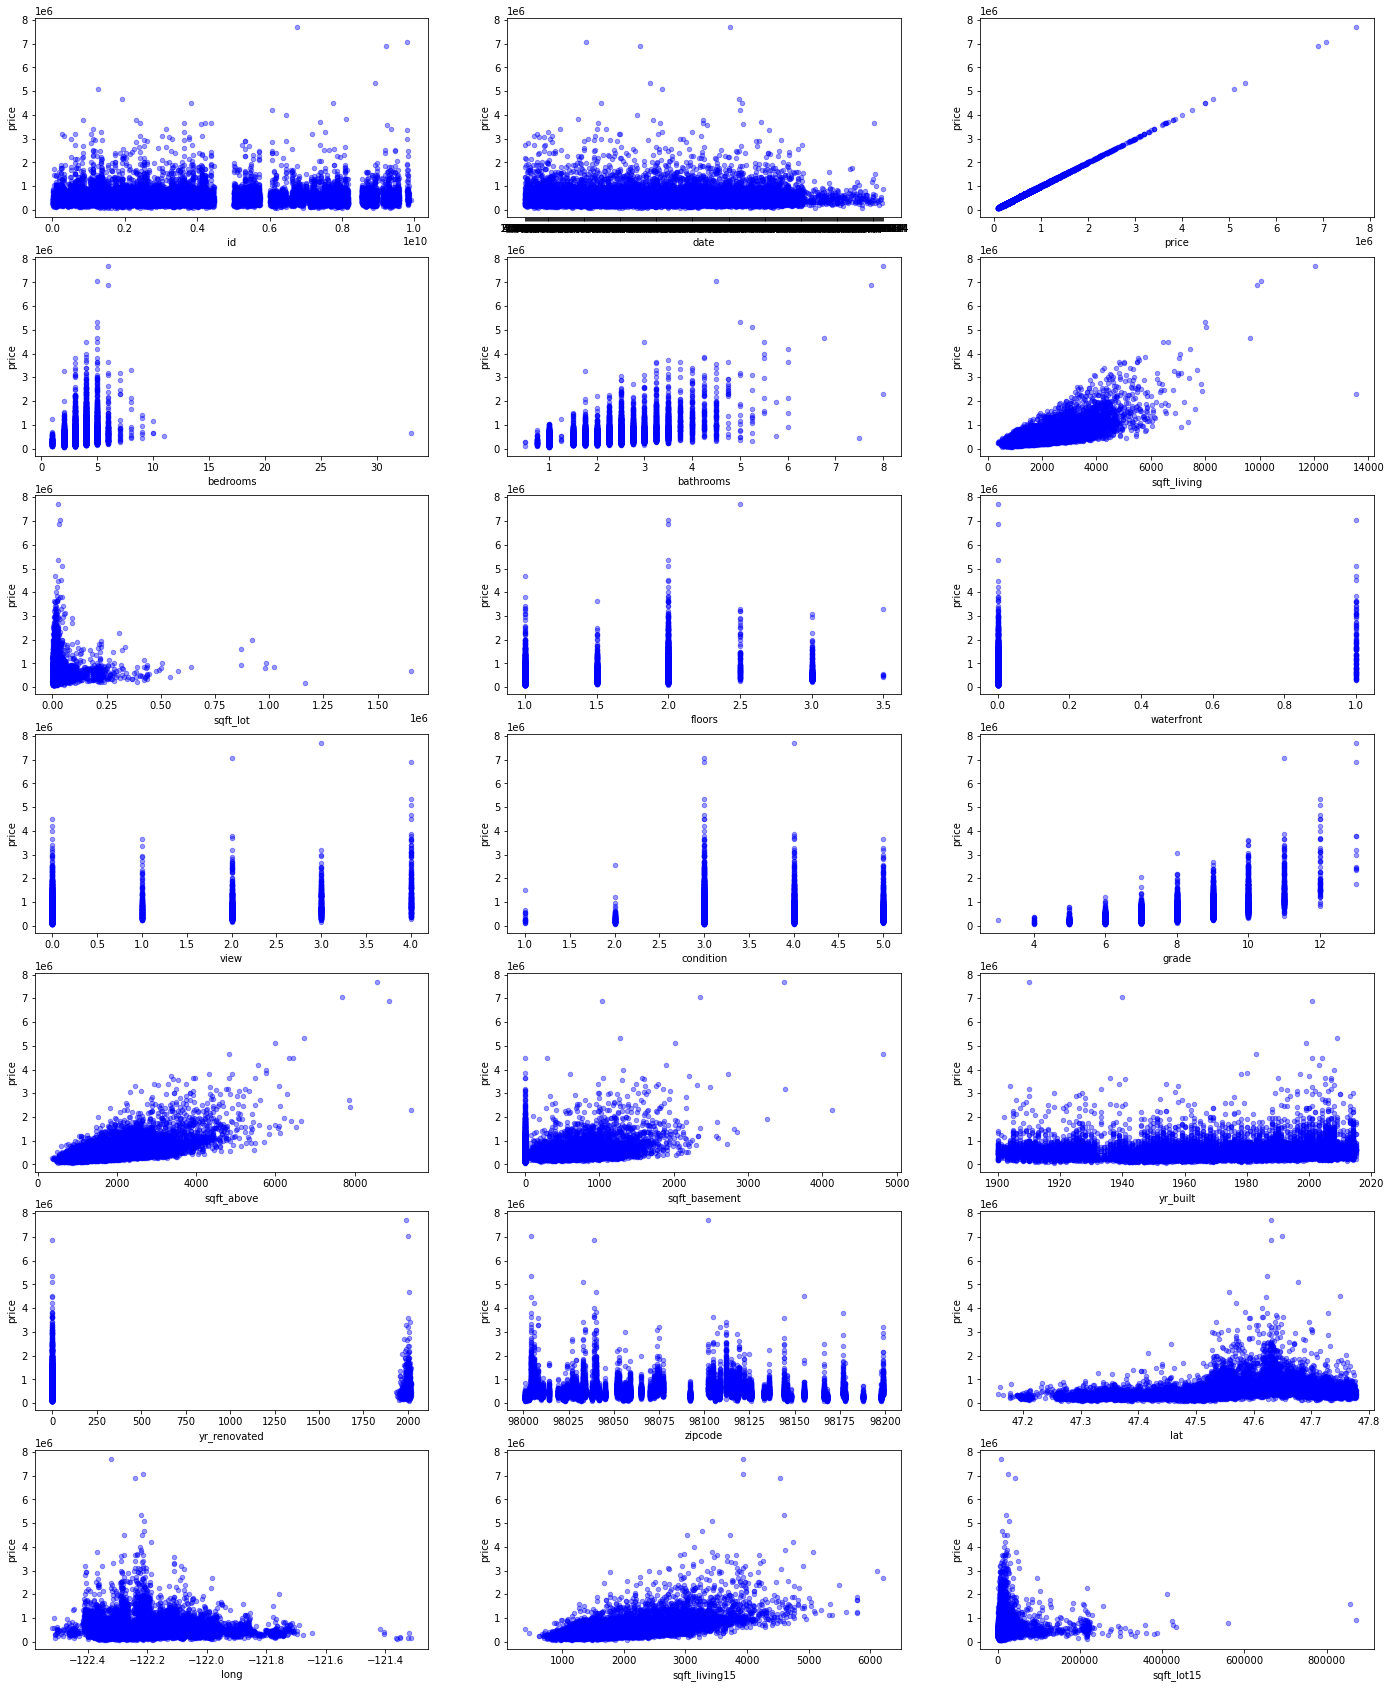

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

 # crate the figure and axes
fig, axes = plt.subplots(7, 3, figsize=(24, 30))   

# unpack all the axes subplots
axe = axes.ravel()

# assign the plot to each subplot in axe
for i, c in enumerate(data.columns):
    
    data.plot(kind='scatter', x=c, y='price', ax=axe[i], alpha=0.4, color='b')

From these graphs and the information enclosed in the document column_names, we can conclude that "Waterfront", "view", "condition", "grade" and "zipcode" are categorical values

In [18]:
continuous_norm = ['bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 'sqft_above', 'yr_built', 'lat', 'sqft_living15', 'sqft_lot15' ]
categoricals_temp = ['waterfront', 'view', 'condition', 'grade']
continous_no_norm = ['sqft_basement', 'yr_renovated', 'long']


#sqft_basement, yr_renovated, long -> I remove these 3 because they have 0 and I can

In [ ]:
#data_ohe = pd.get_dummies(data[categoricals], prefix=categoricals, drop_first=True)

waterfront_dummies = pd.get_dummies(data['waterfront'], prefix='wf', drop_first=True)
view_dummies = pd.get_dummies(data['view'], prefix='vw', drop_first=True)
condition_dummies = pd.get_dummies(data['condition'], prefix='cd', drop_first=True)
grade_dummies = pd.get_dummies(data['grade'], prefix='grade', drop_first=True)


In [ ]:
waterfront_dummies = pd.get_dummies(data['waterfront'], prefix='wf', drop_first=True)
view_dummies = pd.get_dummies(data['view'], prefix='vw', drop_first=True)
condition_dummies = pd.get_dummies(data['condition'], prefix='cd', drop_first=True)
grade_dummies = pd.get_dummies(data['grade'], prefix='grade', drop_first=True)


data_preprocessed = data.drop(['waterfront','view','condition','grade'], axis=1)
data2 = pd.concat([data['price'], waterfront_dummies, view_dummies, condition_dummies, grade_dummies], axis=1)
data2.head(10)

In [ ]:
data.sqft_basement.value_counts()

In [ ]:
 data.yr_renovated.value_counts()


In [ ]:
 data.long.value_counts()



In [ ]:
import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
data[continuous_norm].hist(ax = ax);

In [ ]:
# Log transform and normalize
data_cont = data[continuous_norm]

# log features
log_names = [f'{column}_log' for column in data_cont.columns]
data_log = np.log(data_cont)
data_log.columns = log_names
# normalize (subract mean and divide by std)
def normalize(feature):
    return (feature - feature.mean()) / feature.std()

data_log_norm = data_log.apply(normalize)

data_log_norm.info()


In [ ]:
import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
data_log_norm.hist(ax = ax);

In [ ]:
# Log transform and normalize
data_cont2 = data[continous_no_norm]

# log features
#log_names = [f'{column}_log' for column in data_cont.columns]
#data_log = np.log(data_cont)
#data_log.columns = log_names
# normalize (subract mean and divide by std)
#def normalize(feature):
 #   return (feature - feature.mean()) / feature.std()

data_cont2_norm = data_cont2.apply(normalize)

data_cont2_norm.head()



In [ ]:
X = data2.drop('price', axis=1)
y = data2['price']

In [ ]:
import statsmodels.api as sm
X_int = sm.add_constant(X)
model = sm.OLS(y,X_int).fit()
model.summary()

In [ ]:
#data2 = data.drop(['waterfront','view','condition','grade'], axis=1)
data3 = pd.concat([data2,data_cont2_norm,data_log_norm], axis=1)
data3.head()

In [ ]:
data3 = data3.dropna(how='any')
data3


In [ ]:
X2 = data3.drop('price', axis=1)
y2 = data3['price']

In [ ]:
X2_int = sm.add_constant(X2)
model = sm.OLS(y2,X2_int).fit()
model.summary()

In [ ]:
data3.corr()

In [ ]:
abs(data3.corr()) > 0.75

In [ ]:
# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking
df=data3.corr().abs().stack().reset_index().sort_values(0, ascending=False)
# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df['pairs'] = list(zip(df.level_0, df.level_1))
# set index to pairs
df.set_index(['pairs'], inplace = True)
#d rop level columns
df.drop(columns=['level_1', 'level_0'], inplace = True)
# rename correlation column as cc rather than 0
df.columns = ['cc']
# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
df.drop_duplicates(inplace=True)

In [ ]:
df[(df.cc>.75) & (df.cc <1)]

In [ ]:
import seaborn as sns
sns.heatmap(data3.corr(), center=0);

In [ ]:
data3.info()

In [ ]:
data3

In [ ]:
#https://towardsdatascience.com/how-to-remove-multicollinearity-using-python-4da8d9d8abb2

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X4 = data3[list(data3.columns[:-2])]

vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X4.values, i) for i in range(X4.shape[1])]
vif_info['Column'] = X4.columns
vif_info.sort_values('VIF', ascending=False)




In [ ]:
data3['GradeDiff'] = data3['grade_7'] - data3['grade_8']-data3['grade_9'] - data3['grade_6'] - data3['grade_10'] - data3['grade_11']-data3['grade_5']
data3['cDiff'] = data3['cd_3'] - data3['cd_4']- data3['cd_5']- data3['cd_2']

X5 = data3.drop(['grade_7', 'grade_8', 'grade_9', 'grade_6', 'grade_10', 'grade_11', 'grade_5', 'cd_3', 'cd_4', 'cd_5', 'cd_2'], axis=1)

X5.head()


In [ ]:
vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X5.values, i) for i in range(X5.shape[1])]
vif_info['Column'] = X5.columns
vif_info.sort_values('VIF', ascending=False)

In [ ]:
X5 = X5.drop(['sqft_living_log', 'sqft_above_log', 'sqft_basement','sqft_lot_log'], axis=1)

vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X5.values, i) for i in range(X5.shape[1])]
vif_info['Column'] = X5.columns
vif_info.sort_values('VIF', ascending=False)

In [ ]:
X6 = X5.drop('price', axis=1)
y6 = X5['price']

In [ ]:
import statsmodels.api as sm
X6_int = sm.add_constant(X6)
model = sm.OLS(y6,X6_int).fit()
model.summary()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X6, y6, test_size=0.2, random_state=42)

print(len(X_train), len(X_test), len(y_train), len(y_test))

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

from sklearn.metrics import mean_squared_error
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X6, y6, test_size=0.2, random_state=42)



In [ ]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

In [ ]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

regression = LinearRegression()

crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)
baseline = np.mean(cross_val_score(regression, X6, y6, scoring='r2', cv=crossvalidation))
baseline

In [ ]:
from itertools import combinations

crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)

interactions = []

feat_combinations = combinations(X6.columns, 2)

data = X6.copy()
for i, (a, b) in enumerate(feat_combinations):
    data['interaction'] = data[a] * data[b]
    score = np.mean(cross_val_score(regression, data, y6, scoring='r2', cv=crossvalidation))
    if score > baseline:
        interactions.append((a, b, round(score,3)))
    
    if i % 50 == 0:
        print(i)
            
print('Top 3 interactions: %s' %sorted(interactions, key=lambda inter: inter[2], reverse=True)[:3])

In [ ]:
regression = LinearRegression()
crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)
final = X6.copy()
final['bathrooms_log*sqft_living15_log'] = final['bathrooms_log'] * final['sqft_living15_log']
final['bathrooms_log*GradeDiff'] = final['bathrooms_log'] * final['GradeDiff']
final['sqft_living15_log*GradeDiff'] = final['sqft_living15_log'] * final['GradeDiff']

final_model = np.mean(cross_val_score(regression, final, y6, scoring='r2', cv=crossvalidation))
final_model

In [ ]:
categoricals = pd.concat([waterfront_dummies, view_dummies, condition_dummies, grade_dummies])

categoricals

There are lots of nans, so what I am going to do is delet the values that have NaN. And then run the model. And then if there are some that are not interested, I will delete them so I can have more values
    

In [ ]:
data.info()

In [ ]:
next_data2 = data.dropna(axis=0)
next_data2

In [ ]:
waterfront_dummies = pd.get_dummies(next_data2['waterfront'], prefix='wf', drop_first=True)
view_dummies = pd.get_dummies(next_data2['view'], prefix='vw', drop_first=True)
condition_dummies = pd.get_dummies(next_data2['condition'], prefix='cd', drop_first=True)
grade_dummies = pd.get_dummies(next_data2['grade'], prefix='grade', drop_first=True)

categoricals2 = pd.concat([waterfront_dummies, view_dummies, condition_dummies, grade_dummies])

categoricals2


In [ ]:
data_cont = data[continuous]

In [ ]:
data_cont

In [ ]:
preprocessed = pd.concat([data_cont, categoricals])
preprocessed